# Basic Exploratory Data Analysis on TripAdvisor Las Vegas Hotel Reviews
The dataset contains 504 sets of quantitative and categorical records on visitors to the Las Vegas Strip Dataset extracted from TripAdvisor (http://www.tripadvisor.com).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
file_path = 'LasVegasTripAdvisorReviews-Dataset.xlsx'

In [214]:
df = pd.read_excel('LasVegasTripAdvisorReviews-Dataset.xlsx')

In [4]:
df.head(5)

,Country,Total Reviews,Hotel Reviews,Helpful Votes,Rating,Stay Period,Traveler Type,Has Pool,Has Gym,Has Tennis Court,Has Spa,Has Casino,Has Free Internet,Hotel Name,Hotel Stars,Hotel Rooms,Continent,Membership Years,Review Month,"Review weekday,"
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,"Thursday,"
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,"Friday,"
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,"Saturday,"
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,"Friday,"
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,"Tuesday,"


## Data inspection and manipulation

In [6]:
#check features of the dataset
df.shape

(504, 20)

In [7]:
#check the names of the columns
print(df.columns)

Index(['Country', 'Total Reviews', 'Hotel Reviews', 'Helpful Votes', 'Rating',
       'Stay Period', 'Traveler Type', 'Has Pool', 'Has Gym',
       'Has Tennis Court', 'Has Spa', 'Has Casino', 'Has Free Internet',
       'Hotel Name', 'Hotel Stars', 'Hotel Rooms', 'Continent',
       'Membership Years', 'Review Month', 'Review weekday,'],
      dtype='object')


In [8]:
#check the datatypes
df.dtypes

Country              object
Total Reviews         int64
Hotel Reviews         int64
Helpful Votes         int64
Rating                int64
Stay Period          object
Traveler Type        object
Has Pool             object
Has Gym              object
Has Tennis Court     object
Has Spa              object
Has Casino           object
Has Free Internet    object
Hotel Name           object
Hotel Stars          object
Hotel Rooms           int64
Continent            object
Membership Years      int64
Review Month         object
Review weekday,      object
dtype: object

In [9]:
#check additional features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            504 non-null    object
 1   Total Reviews      504 non-null    int64 
 2   Hotel Reviews      504 non-null    int64 
 3   Helpful Votes      504 non-null    int64 
 4   Rating             504 non-null    int64 
 5   Stay Period        504 non-null    object
 6   Traveler Type      504 non-null    object
 7   Has Pool           504 non-null    object
 8   Has Gym            504 non-null    object
 9   Has Tennis Court   504 non-null    object
 10  Has Spa            504 non-null    object
 11  Has Casino         504 non-null    object
 12  Has Free Internet  504 non-null    object
 13  Hotel Name         504 non-null    object
 14  Hotel Stars        504 non-null    object
 15  Hotel Rooms        504 non-null    int64 
 16  Continent          504 non-null    object
 1

In [10]:
#check for missing values
df.isnull()

,Country,Total Reviews,Hotel Reviews,Helpful Votes,Rating,Stay Period,Traveler Type,Has Pool,Has Gym,Has Tennis Court,Has Spa,Has Casino,Has Free Internet,Hotel Name,Hotel Stars,Hotel Rooms,Continent,Membership Years,Review Month,"Review weekday,"
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [164]:
#check statistics of the dataset
df.describe().astype('int')

,Total Reviews,Hotel Reviews,Helpful Votes,Rating,Hotel Rooms,Membership Years
count,504,504,504,504,504,503
mean,48,16,31,4,2196,4
std,74,23,48,1,1285,2
min,1,0,0,1,188,0
25%,12,5,8,4,826,2
50%,23,9,16,4,2700,4
75%,54,18,35,5,3025,6
max,775,263,365,5,4027,13


## Exploratory Data Analysis: Relationships, Insights and Visualizations

## - Univariate analysis
- considering one variable at a time from the dataset
  
    


## Variable - Country

In [12]:
column_stats = df['Country'].describe()

# Print the descriptive statistics
print(column_stats)


count     504
unique     47
top       USA
freq      217
Name: Country, dtype: object


In [13]:
unique_Country_count = df['Country'].nunique()
print("Number of unique ID numbers in 'country':", unique_Country_count)

Number of unique ID numbers in 'country': 47


In [14]:
#number of visitors per country
value_counts = df['Country'].value_counts()

# Print the value counts
print(value_counts)

USA                     217
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    12
Mexico                    8
Germany                   7
Egypt                     5
Brazil                    5
New Zeland                5
Singapore                 4
Netherlands               4
Norway                    3
Israel                    3
Thailand                  3
Hawaii                    3
Malaysia                  3
Finland                   3
Spain                     2
United Arab Emirates      2
Scotland                  2
Switzerland               2
Costa Rica                2
Kenya                     1
Korea                     1
Japan                     1
Czech Republic            1
Kuwait                    1
Taiwan                    1
Denmark                   1
Honduras                  1
Saudi Arabia              1
Iran                      1
China                     1
Jordan              

In [15]:
#what are the top 10 countries
top_10_Countries = df['Country'].value_counts().head(10)

print(top_10_Countries)

USA          217
UK            72
Canada        65
Australia     36
Ireland       13
India         12
Mexico         8
Germany        7
Egypt          5
Brazil         5
Name: Country, dtype: int64


In [16]:
# Calculate the sum of the top 10 values
sum_top_10_Countries = top_10_Countries.sum()

# Print the sum of the top 10 values
print(sum_top_10_Countries)


440


In [17]:
(440/504)*100

87.3015873015873

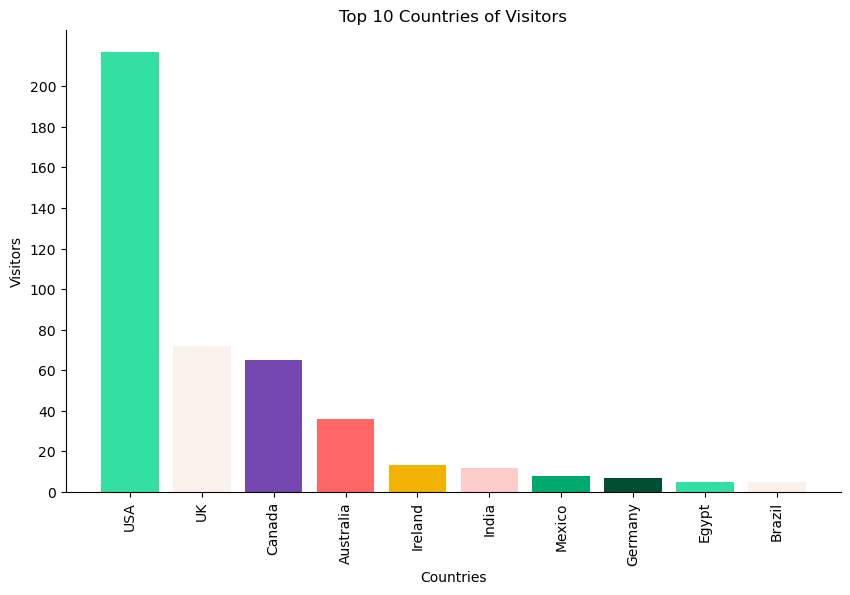

In [168]:
# Use TripAdvisor colors to create a palette for visualization
TripA_palette = ['#34E0A1', '#FAF1ED', '#7446AF', '#FF6666', '#F2B203', '#FFCCCC', '#00AA6C', '#004F32']

# Show top 10 countries graphically
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_Countries.index, top_10_Countries.values, color=TripA_palette)

# Set the x-axis tick labels to rotate for better readability
plt.xticks(rotation='vertical')
plt.yticks(range(0, max(top_10_Countries.values) + 1, 20))

# Remove the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('Visitors')
plt.title('Top 10 Countries of Visitors')

# Set the TripA color palette
sns.set_palette(TripA_palette)

# Show the plot
plt.show()


### Observation: 'Country'
- The top 10 countries make up 440 out of the 504 entries which is 87.3% of the dataset
- The highest number of visitors come from the USA (217 visitors), followed by the UK(72 visitors) and Canada (65 visitors)
- 23 countries each had 1 visitor only ( Kenya, Korea, Japan, Czech Republic, Kuwait, Taiwan, Denmark,Honduras, Saudi Arabia, Iran, China, Jordan, Greece, France, Syria, Puerto Rico, Belgium, Phillippines, South Africa, Swiss, Croatia, Hungary, Italy) 

## Variable - Traveller Type

In [19]:
unique_Traveler_Type_count = df['Traveler Type'].nunique()
print("Number of unique ID numbers in 'Traveler Type':", unique_Traveler_Type_count)

Number of unique ID numbers in 'Traveler Type': 5


In [20]:
unique_Traveler_Names = df['Traveler Type'].unique()
print("Number of unique ID numbers in 'Traveler Type':", unique_Traveler_Names)

Number of unique ID numbers in 'Traveler Type': ['Friends' 'Business' 'Families' 'Solo' 'Couples']


In [21]:
value_counts = df['Traveler Type'].value_counts()
print(value_counts)

Couples     214
Families    110
Friends      82
Business     74
Solo         24
Name: Traveler Type, dtype: int64


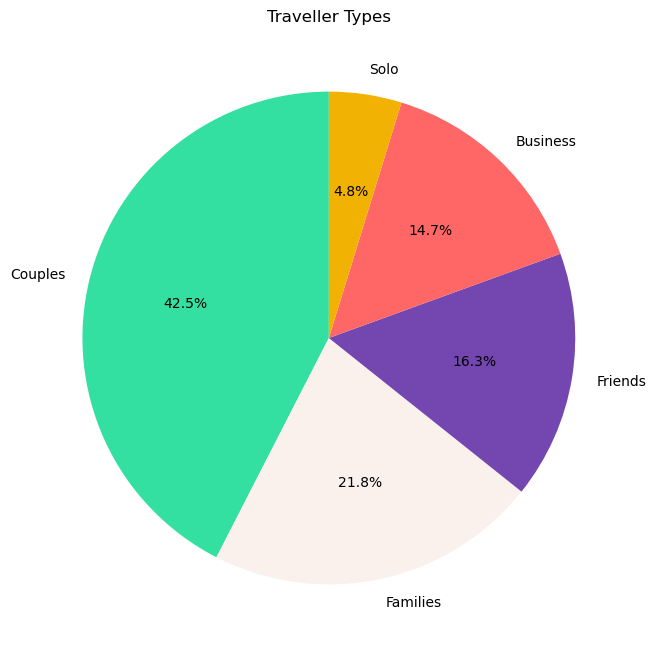

In [22]:
import matplotlib.pyplot as plt

#Create a pie chart to visualize the different Traveller Types within the dataset
Traveller_counts = df['Traveler Type'].value_counts()

plt.figure(figsize=(8, 8))
Traveller_counts.plot.pie(autopct='%1.1f%%', startangle=90)
sns.set_palette(TripA_palette)

plt.title('Traveller Types')
plt.ylabel('')

plt.show()



### Observation: 'Traveller Types'
- There are 5 Traveller Types in the dataset namely Business, Couples, Families, Friends and Solo travellers
- Couples make up 42.5% of the dataset, followed by Families, Friends, Business and Solo travellers


In [23]:
df.columns

Index(['Country', 'Total Reviews', 'Hotel Reviews', 'Helpful Votes', 'Rating',
       'Stay Period', 'Traveler Type', 'Has Pool', 'Has Gym',
       'Has Tennis Court', 'Has Spa', 'Has Casino', 'Has Free Internet',
       'Hotel Name', 'Hotel Stars', 'Hotel Rooms', 'Continent',
       'Membership Years', 'Review Month', 'Review weekday,'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            504 non-null    object
 1   Total Reviews      504 non-null    int64 
 2   Hotel Reviews      504 non-null    int64 
 3   Helpful Votes      504 non-null    int64 
 4   Rating             504 non-null    int64 
 5   Stay Period        504 non-null    object
 6   Traveler Type      504 non-null    object
 7   Has Pool           504 non-null    object
 8   Has Gym            504 non-null    object
 9   Has Tennis Court   504 non-null    object
 10  Has Spa            504 non-null    object
 11  Has Casino         504 non-null    object
 12  Has Free Internet  504 non-null    object
 13  Hotel Name         504 non-null    object
 14  Hotel Stars        504 non-null    object
 15  Hotel Rooms        504 non-null    int64 
 16  Continent          504 non-null    object
 1

## Variable - Hotel Name

In [25]:
#number of hotels in the dataset
unique_Hotel_Name_count = df['Hotel Name'].nunique()
print("Number of unique ID numbers in 'Hotel Name':", unique_Hotel_Name_count)

Number of unique ID numbers in 'Hotel Name': 21


In [26]:
#names of hotels in the dataset
unique_Hotel_Names = df['Hotel Name'].unique()
print("Number of unique ID numbers in 'Hotel Name':", unique_Hotel_Names)

Number of unique ID numbers in 'Hotel Name': ['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 'The Cromwell'
 'Encore at wynn Las Vegas' 'Hilton Grand Vacations on the Boulevard'
 "Marriott's Grand Chateau" 'Tuscany Las Vegas Suites & Casino'
 'Hilton Grand Vacations at the Flamingo' 'Wyndham Grand Desert'
 'The Venetian Las Vegas Hotel' 'Bellagio Las Vegas' 'Paris Las Vegas'
 'The Westin las Vegas Hotel Casino & Spa']


In [27]:
#frequency of each hotel in the dataset
count_Hotels = df['Hotel Name'].value_counts()
print(count_Hotels)

Circus Circus Hotel & Casino Las Vegas                 24
Encore at wynn Las Vegas                               24
Paris Las Vegas                                        24
Bellagio Las Vegas                                     24
The Venetian Las Vegas Hotel                           24
Wyndham Grand Desert                                   24
Hilton Grand Vacations at the Flamingo                 24
Tuscany Las Vegas Suites & Casino                      24
Marriott's Grand Chateau                               24
Hilton Grand Vacations on the Boulevard                24
The Cromwell                                           24
Excalibur Hotel & Casino                               24
Trump International Hotel Las Vegas                    24
Wynn Las Vegas                                         24
The Palazzo Resort Hotel Casino                        24
The Cosmopolitan Las Vegas                             24
Caesars Palace                                         24
Tropicana Las 

In [28]:
21*24

504

### Observation: 'Hotel Name'
- There are 504 entries with 21 hotels listed in the dataset
- Each hotel is listed 24 times. There are no null values

## Variable - 'Stay Period'

In [29]:
#stay period descriptive statistics

column_stats = df['Stay Period'].describe()
print(column_stats)

count         504
unique          4
top       Mar-May
freq          128
Name: Stay Period, dtype: object


In [30]:
value_counts = df['Stay Period'].value_counts()
print(value_counts)

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Stay Period, dtype: int64


In [31]:
#calculate average and standard deviation
average_stay_count = df['Stay Period'].value_counts().mean()
print("Average number of visitors per 'Stay Period':", average_stay_count)

std_stay_count = df['Stay Period'].value_counts().std()
print ("Standard Deviation of visitors per 'Stay Period':", std_stay_count)

Average number of visitors per 'Stay Period': 126.0
Standard Deviation of visitors per 'Stay Period': 1.632993161855452


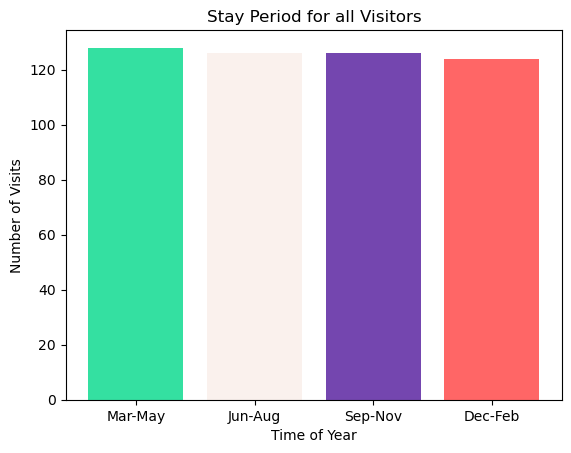

In [32]:
stay_values = df['Stay Period'].value_counts()
plt.bar(stay_values.index, stay_values.values, color=TripA_palette)

plt.xlabel('Time of Year')
plt.ylabel('Number of Visits')
plt.title('Stay Period for all Visitors')

plt.show()


### Observation: 'Stay Period'
- Four stay periods are listed in the dataset (Mar-May, Jun-Aug, Sep-Nov, Dec-Feb)
- The average count of visitors per stay period is 124 
        - Mar-May having 128 visitors, 
        - Jun-Aug and Sep-Nov each have 126 visitors 
        - and Dec-Feb has 124 visitors
- The standard deviation between stay periods is 1.63 visitors indicating that there is no major difference between stay periods and stay period is not a major inidicator of visitor preference based on the dataset

## - Bivariate analysis
- considering the relationship between two variables from the dataset at a time

## Variables - 'Stay Period', 'Traveller Types' and 'Country'

### Preferred Stay Period of Visitors from all Countries

In [236]:
# Count stay period of visitors for all countries
country_stay_counts_all = df.groupby(['Country', 'Stay Period']).size().unstack()


# Display the counts
print("Stay Period Count per Country - All Countries:")
print(country_stay_counts_all)

Stay Period Count per Country - All Countries:
Stay Period           Dec-Feb  Jun-Aug  Mar-May  Sep-Nov
Country                                                 
Australia                 6.0     10.0      8.0     12.0
Belgium                   NaN      NaN      1.0      NaN
Brazil                    NaN      NaN      3.0      2.0
Canada                   17.0     12.0     21.0     15.0
China                     NaN      NaN      NaN      1.0
Costa Rica                NaN      1.0      NaN      1.0
Croatia                   1.0      NaN      NaN      NaN
Czech Republic            NaN      NaN      NaN      1.0
Denmark                   NaN      1.0      NaN      NaN
Egypt                     NaN      1.0      2.0      2.0
Finland                   NaN      3.0      NaN      NaN
France                    NaN      NaN      1.0      NaN
Germany                   1.0      2.0      3.0      1.0
Greece                    1.0      NaN      NaN      NaN
Hawaii                    NaN      NaN   

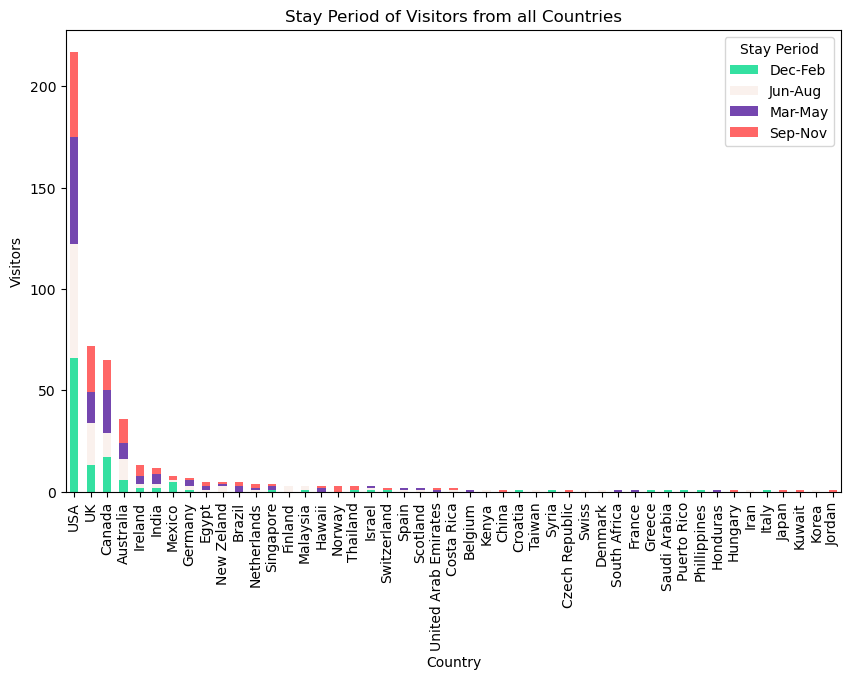

In [222]:
# Plot a stacked bar chart to show the different stay periods per country for all countries
country_stay_counts = df.groupby(['Country', 'Stay Period']).size().unstack()

# Sort the data in ascending order based on the sum of each row
country_stay_counts = country_stay_counts.loc[country_stay_counts.sum(axis=1).sort_values(ascending=False).index]

country_stay_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=TripA_palette)

plt.ylabel('Visitors')
plt.title('Stay Period of Visitors from all Countries')

# Show the plot
plt.show()


In [35]:
# Count stay period per country for the top 10 countries
top_10_countries = df['Country'].value_counts().head(10)
top_10_country_stay_counts = df[df['Country'].isin(top_10_countries.index)].groupby('Country')['Stay Period'].value_counts().unstack()

# Sort the DataFrame by the sum of stay period counts in descending order
top_10_country_stay_counts = top_10_country_stay_counts.loc[top_10_countries.index]
top_10_country_stay_counts = top_10_country_stay_counts.loc[:, top_10_country_stay_counts.sum().sort_values(ascending=False).index]

print("\nStay Period Count per Country - Top 10 Countries:")
print(top_10_country_stay_counts)



Stay Period Count per Country - Top 10 Countries:
Stay Period  Mar-May  Dec-Feb  Jun-Aug  Sep-Nov
USA             53.0     66.0     56.0     42.0
UK              15.0     13.0     21.0     23.0
Canada          21.0     17.0     12.0     15.0
Australia        8.0      6.0     10.0     12.0
Ireland          4.0      2.0      2.0      5.0
India            5.0      2.0      2.0      3.0
Mexico           NaN      5.0      1.0      2.0
Germany          3.0      1.0      2.0      1.0
Egypt            2.0      NaN      1.0      2.0
Brazil           3.0      NaN      NaN      2.0


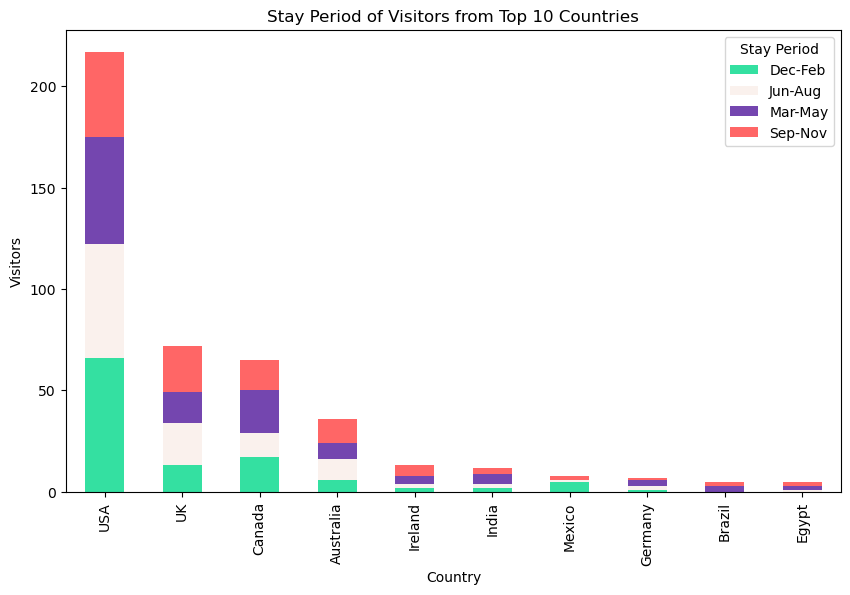

In [223]:
# Plot a stacked bar chart to show the different stay periods per country for the top 10 countries
# Get the top 10 countries based on visitor count
top_10_Countries = df['Country'].value_counts().head(10)

# Filter the DataFrame, group and sort the data for the top 10 countries
top_10_countries_data = df[df['Country'].isin(top_10_Countries.index)]
top_10country_stay_counts = top_10_countries_data.groupby(['Country', 'Stay Period']).size().unstack()
top_10country_stay_counts = top_10country_stay_counts.loc[top_10country_stay_counts.sum(axis=1).sort_values(ascending=False).index]

top_10country_stay_counts.plot(kind='bar', stacked=True,figsize=(10, 6), color=TripA_palette)

plt.ylabel('Visitors')
plt.title('Stay Period of Visitors from Top 10 Countries')

plt.show()


### Observation: 

- Mar-May is the most popular Stay Period among visitors from the Top 10 countries with 114 visitors, followed by Dec-Feb with 112 visitors while 107 visitors visited the Las Vegas hotels during Jun-Aug and  Sep-Nov respectively

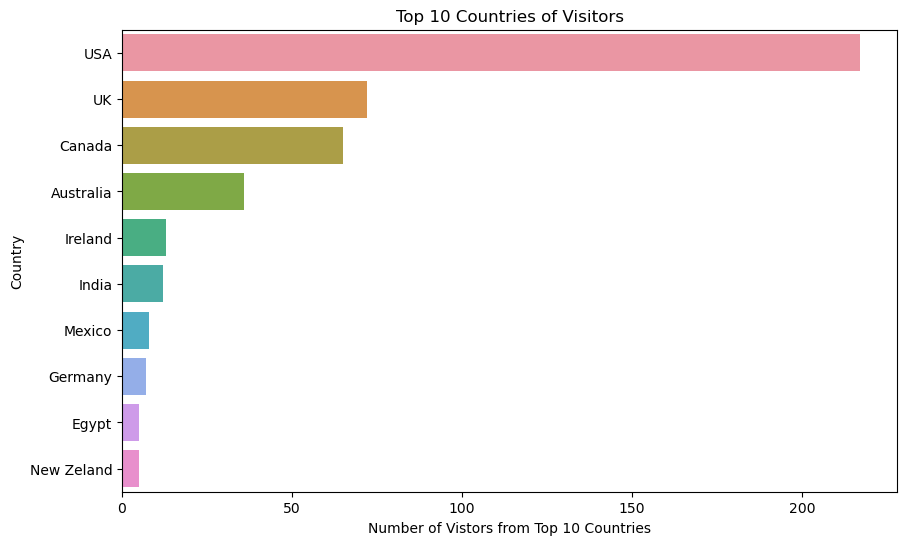

In [39]:
hotels_per_country = df.groupby('Country')['Hotel Name'].count().reset_index()

# Sort the data by the number of hotels in descending order
hotels_per_country = hotels_per_country.sort_values(by='Hotel Name', ascending=False)

# Select the top 10 countries
top_10_countries = hotels_per_country.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Hotel Name', y='Country', data=top_10_countries)

# Set the x-axis label
plt.xlabel('Number of Vistors from Top 10 Countries')


# Set the title
plt.title('Top 10 Countries of Visitors')
sns.set_palette('PuRd_r')
plt.show()



In [203]:
import pandas as pd

# Get the unique hotel names from the 'Hotel Name' column
unique_hotel_names = df['Hotel Name'].unique()

# Print the unique hotel names
print(unique_hotel_names)


['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 'The Cromwell'
 'Encore at wynn Las Vegas' 'Hilton Grand Vacations on the Boulevard'
 "Marriott's Grand Chateau" 'Tuscany Las Vegas Suites & Casino'
 'Hilton Grand Vacations at the Flamingo' 'Wyndham Grand Desert'
 'The Venetian Las Vegas Hotel' 'Bellagio Las Vegas' 'Paris Las Vegas'
 'The Westin las Vegas Hotel Casino & Spa']


In [204]:
import pandas as pd

# Select the top 10 countries
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
filtered_df = df[df['Country'].isin(top_10_countries)]

# Create a cross-tabulation of hotel names and countries
cross_tab = pd.crosstab(filtered_df['Hotel Name'], filtered_df['Country'])

# Get the hotel names and their respective counts from the column 'Hotel Name'
hotel_names = cross_tab.index
hotel_counts = cross_tab.sum(axis=1)

# Create a DataFrame to store the hotel names and counts
hotel_data = pd.DataFrame({'Hotel Name': hotel_names, 'Visitor Count': hotel_counts})

# Print the hotel data
print(hotel_data)


                                                                                           Hotel Name  \
Hotel Name                                                                                              
Bellagio Las Vegas                                                                 Bellagio Las Vegas   
Caesars Palace                                                                         Caesars Palace   
Circus Circus Hotel & Casino Las Vegas                         Circus Circus Hotel & Casino Las Vegas   
Encore at wynn Las Vegas                                                     Encore at wynn Las Vegas   
Excalibur Hotel & Casino                                                     Excalibur Hotel & Casino   
Hilton Grand Vacations at the Flamingo                         Hilton Grand Vacations at the Flamingo   
Hilton Grand Vacations on the Boulevard                       Hilton Grand Vacations on the Boulevard   
Marriott's Grand Chateau                               

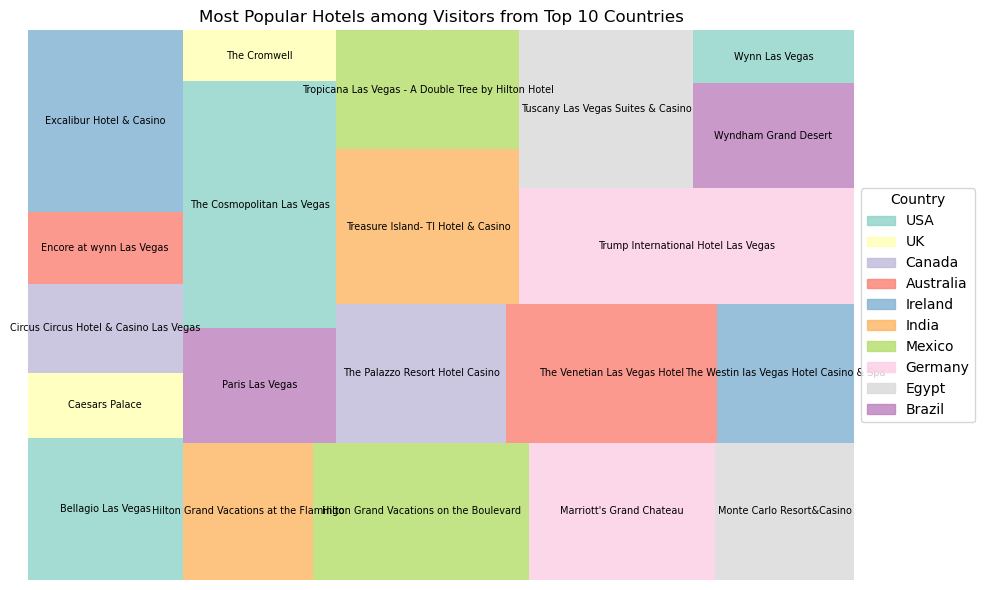

In [235]:
#Show most popular Hotel Names per Country

!pip install squarify
# Select the top 10 countries
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the DataFrame for the top 10 countries
filtered_df = df[df['Country'].isin(top_10_countries)]

# Create a cross-tabulation of hotel names and countries
cross_tab = pd.crosstab(filtered_df['Hotel Name'], filtered_df['Country'])

# Normalize the counts within each country to create proportions
normalized_cross_tab = cross_tab.div(cross_tab.sum(axis=0), axis=1)

# Create a treemap to visualize the preferred hotels by country
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(range(len(top_10_countries)))

# Generate treemap using squarify and specify additional parameters
squarify.plot(sizes=normalized_cross_tab.sum(axis=1), label=cross_tab.index, color=colors, alpha=0.8, text_kwargs={'fontsize': 7})
plt.axis('off')

# Create a legend with the country names
legend_labels = top_10_countries.tolist()
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=c, alpha=0.8) for c in colors], labels=legend_labels, title='Country', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title('Most Popular Hotels among Visitors from Top 10 Countries')
plt.tight_layout()
plt.show()


### Observation

- More visitors from USA stayed at The Cosmopolitan and Bellagio Las Vegas
- UK guests mainly stayed at Caesars Palace and The Cromwell
- Visitors from Canada stayed mostly at Circus Circus and The Palazzo Resort Hotel

## Variables -  'Traveller Types' and 'Country'

In [230]:

# Count traveller types per country for the top 10 countries
top_10_countries = df['Country'].value_counts().head(10)
top_10_country_traveller_counts = df[df['Country'].isin(top_10_countries.index)].groupby('Country')['Traveler Type'].value_counts().unstack()

# Sort the DataFrame by the sum of traveller type counts in descending order
top_10_country_traveller_counts = top_10_country_traveller_counts.loc[top_10_countries.index]
top_10_country_traveller_counts = top_10_country_traveller_counts.loc[:, top_10_country_traveller_counts.sum().sort_values(ascending=False).index]

print("\nTraveller Types per Country - Top 10 Countries:")
print(top_10_country_traveller_counts)



Traveller Types per Country - Top 10 Countries:
Traveler Type  Couples  Families  Friends  Business  Solo
USA               90.0      40.0     35.0      41.0  11.0
UK                37.0      16.0     12.0       5.0   2.0
Canada            30.0      16.0     10.0       7.0   2.0
Australia         18.0      10.0      5.0       2.0   1.0
Ireland            7.0       NaN      4.0       2.0   NaN
India              3.0       4.0      1.0       3.0   1.0
Mexico             4.0       3.0      NaN       1.0   NaN
Germany            3.0       2.0      1.0       1.0   NaN
Egypt              NaN       2.0      1.0       1.0   1.0
Brazil             2.0       3.0      NaN       NaN   NaN


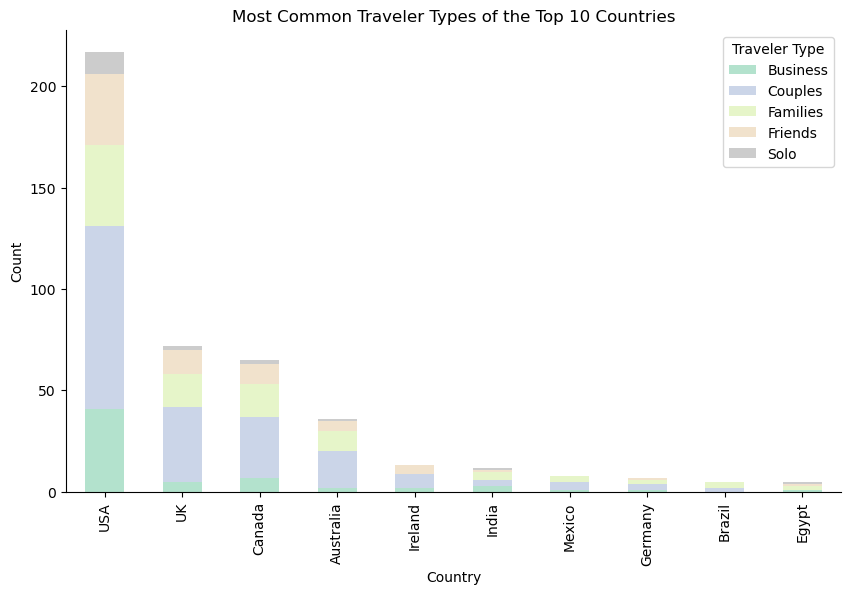

In [70]:
#Most Common Traveler Types from the Top 10 countries

country_counts = df['Country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10).index

# Filter the data for the top 10 countries
filtered_data = df[df['Country'].isin(top_10_countries)]

# Group the filtered data by country and traveler type, and count the occurrences
grouped_data = filtered_data.groupby(['Country', 'Traveler Type']).size().unstack()

# Sort the rows based on the sum of traveler types in descending order
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar plot with the sorted rows
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel2')

# Set the x-axis label
ax.set_xlabel('Country')

# Set the y-axis label
ax.set_ylabel('Count')

# Set the title
ax.set_title('Most Common Traveler Types of the Top 10 Countries')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


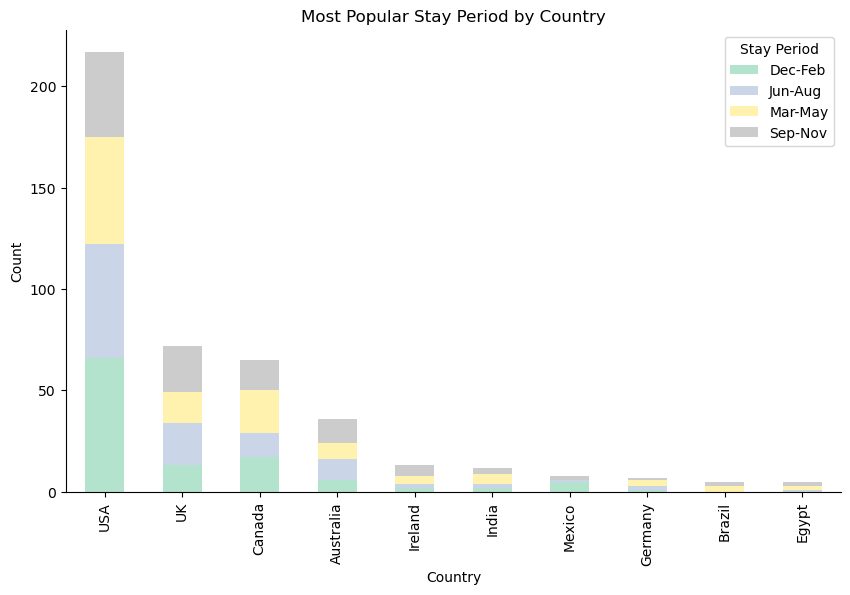

In [54]:
country_counts = df['Country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10).index

# Filter the data for the top 10 countries
filtered_data = df[df['Country'].isin(top_10_countries)]

# Group the filtered data by country and traveler type, and count the occurrences
grouped_data = filtered_data.groupby(['Country', 'Stay Period']).size().unstack()

# Sort the rows based on the sum of traveler types in descending order
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar plot with the sorted rows
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel2')

# Set the x-axis label
ax.set_xlabel('Country')

# Set the y-axis label
ax.set_ylabel('Count')

# Set the title
ax.set_title('Most Popular Stay Period by Country')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

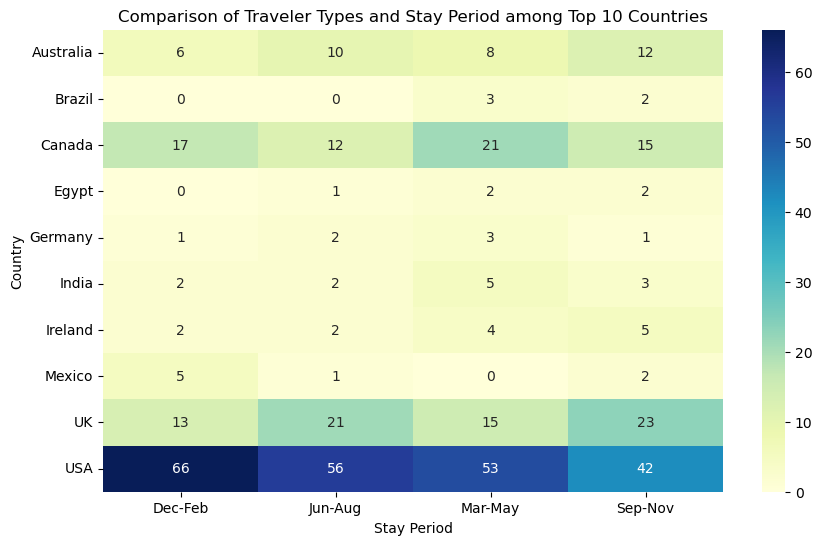

In [244]:
#Compare Traveller Types and Stay Period (Top 10)
# Select the top 10 countries
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the data for the top 10 countries
filtered_data = df[df['Country'].isin(top_10_countries)]

# Pivot the data to create a matrix of traveler types, country, and Stay Period
pivot_data = filtered_data.pivot_table(index='Country', columns='Stay Period', values='Traveler Type', aggfunc='count', fill_value=0)

# Create a heatmap to visualize traveler types by country and Stay Period
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_data, annot=True, cmap='YlGnBu')
plt.xlabel('Stay Period')
plt.ylabel('Country')
plt.title('Comparison of Traveler Types and Stay Period among Top 10 Countries')
plt.show()


### Observation
- The most popular Traveller Type across Top 10 countries is Couples with 194
- There were 96 Family visitors, 69 Friend visitors and 63 Business visitors
- Solo travellers made up the smallest Traveller Type with 18 visitors
- Most Business, Friend and Solo travellers were from the USA

In [68]:
unique_countries = df['Country'].unique()
print(unique_countries)

['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland'
 'South Africa' 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece'
 'Mexico' 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines'
 'Israel' 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France' 'Spain'
 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia' 'Honduras'
 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan' 'Korea'
 'Italy']


## Bivariate Analysis

### Variables - 'Membership Years' and 'Country'





In [248]:
# Replace negative values with NaN in 'Membership Years' column
df['Membership Years'] = np.where(df['Membership Years'] < 0, np.nan, df['Membership Years'])

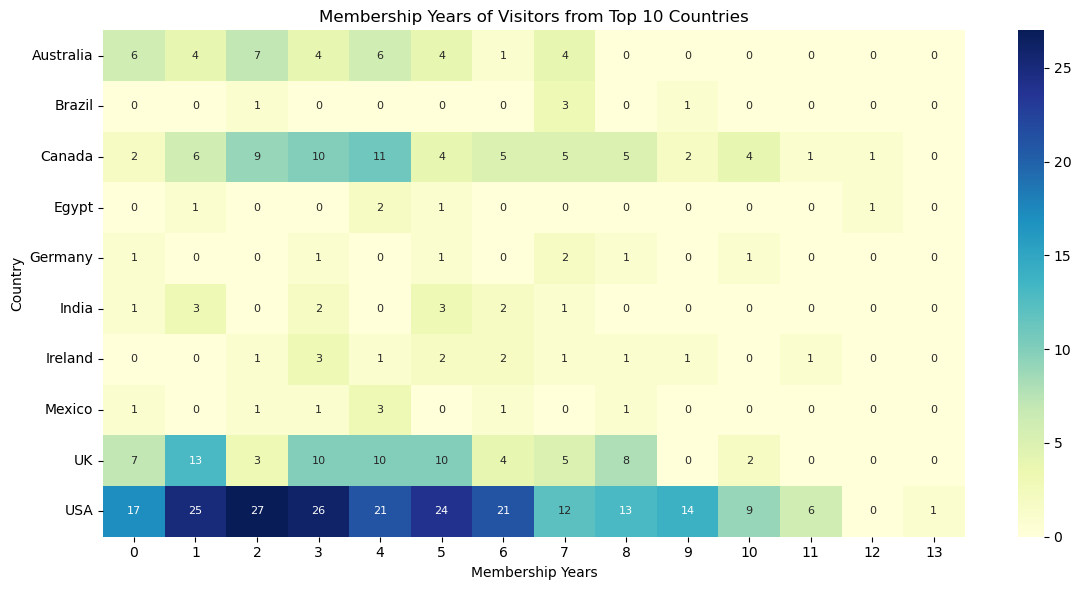

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for analysis
selected_columns = ['Country', 'Membership Years']

# Create a subset DataFrame with the selected columns
data_subset = df[selected_columns]

# Drop rows with missing values
data_subset = data_subset.dropna()

# Get the top 10 countries based on visitor count
top_10_countries = data_subset['Country'].value_counts().head(10).index

# Filter the data for the top 10 countries
data_subset = data_subset[data_subset['Country'].isin(top_10_countries)]

# Remove the annotation of 1806 years from the Membership Years column
data_subset['Membership Years'] = data_subset['Membership Years'].replace(1806, np.nan)

# Filter the data for membership years <= 20
data_subset = data_subset[data_subset['Membership Years'] <= 20]

# Convert 'Membership Years' column to integers by taking absolute values, rounding, and then astype(int)
data_subset['Membership Years'] = data_subset['Membership Years'].abs().round().astype(int)

# Group the data by country and membership years and count the occurrences
grouped_data = data_subset.groupby(['Country', 'Membership Years']).size().unstack()

# Convert float values to integers
grouped_data = grouped_data.fillna(0).astype(int)

# Create a heatmap to visualize the number of visitors by country and membership years
plt.figure(figsize=(12, 6))
sns.heatmap(data=grouped_data, cmap='YlGnBu', annot=True, fmt='d', annot_kws={'size': 8}, cbar=True)
plt.xlabel('Membership Years')
plt.ylabel('Country')
plt.title('Membership Years of Visitors from Top 10 Countries')
plt.tight_layout()
plt.show()


### Observation
- The data needed to be adjusted due to an anomaly in the Membership Years which showed one entry to have been a member for -1806 years
- To correct this, all negative values in Membership Years (<0) were replaced with NaN. This enabled the data to subsequently be processed appropriately
- Most Members in the database were from the US with most being members for 1 - 6 years. There was 1 US visitor who had been a Member for 13 years
- Most members from other countries ranged between 1 and 5 years

## Overall Recommendations

- The Las Vegas Trip Advisor database used in this analysis had 504 entries with 21 hotels listed in the database. Each hotel is listed 24 times. There are were null values.
- The databse featured visitors from  countries with the Top 10 countries with the most visitors making up 87.4% of the databse
- The top 10 countries were USA, UK, Canada, Australia, Ireland, India, Mexico, Germany, Egypt and Brazil
- Most of the visitors to Las Vegas within the period covered by the database are domestic (USA) visitors with 194 of these being Couples. This creates an opportunity to drive promotion of Las Vegas offers to USA customers targetted at Couples
- There is also an opportunity to create targtted promotions to Las Vegas among potential visitors from teh Top 10 countries
- As some hotels are more popular with visitors from varying countries ( most USA vistors stayed at The Cosmopolitan and Bellagio Las Vegas, UK guests mainly stayed at Caesars Palace and The Cromwell, visitors from Canada stayed mostly at Circus Circus and The Palazzo Resort Hotel), there is also an opportunity for hotels to target customers from specific locations
- As the most popular Traveller Type was Couples follwed by Families, there is a huge opportunity to grow this audience by promoting to them directly through the TripAdvisor website or through affiliates who also target couples and families.
- Targetted promotions can be made to members to drive increase in membership as well as repeat visits to Las Vegas
- There was not a significant difference in the overall rate of occupancy during the different Stay Periods. However, most USA guests visited between Dec- Feb, most UK guests visited between Sep-Nov and most Canadian guests visited between Mar- May.